# Sales Data Analytics

### Data Load

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [19]:
df_sales = pd.read_csv("./files/dataset.csv")
df_sales

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200


### EDA (Exploratory Data Analysis)

In [20]:
df_sales.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [21]:
df_sales.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [22]:
# format date
df_sales["Data_Pedido"] = pd.to_datetime(df_sales["Data_Pedido"], format="%d/%m/%Y")
df_sales.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [23]:
df_sales["Valor_Venda"].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [24]:
df_sales[df_sales.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [25]:
df_sales.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

### Question 1
What is the Total Sales by Order Date? Demonstrate the result through a line graph.

In [26]:
df_total_date = df_sales.groupby("Data_Pedido")["Valor_Venda"].sum()
df_total_date.sort_index(ascending=False)

Data_Pedido
2018-12-30     713.7900
2018-12-29    2915.5340
2018-12-28    1657.3508
2018-12-27     177.6360
2018-12-26     814.5940
                ...    
2015-01-07      87.1580
2015-01-06    4407.1000
2015-01-05      19.5360
2015-01-04     288.0600
2015-01-03      16.4480
Name: Valor_Venda, Length: 1226, dtype: float64

<Axes: title={'center': 'Total de Vendas por Data'}, xlabel='Data_Pedido'>

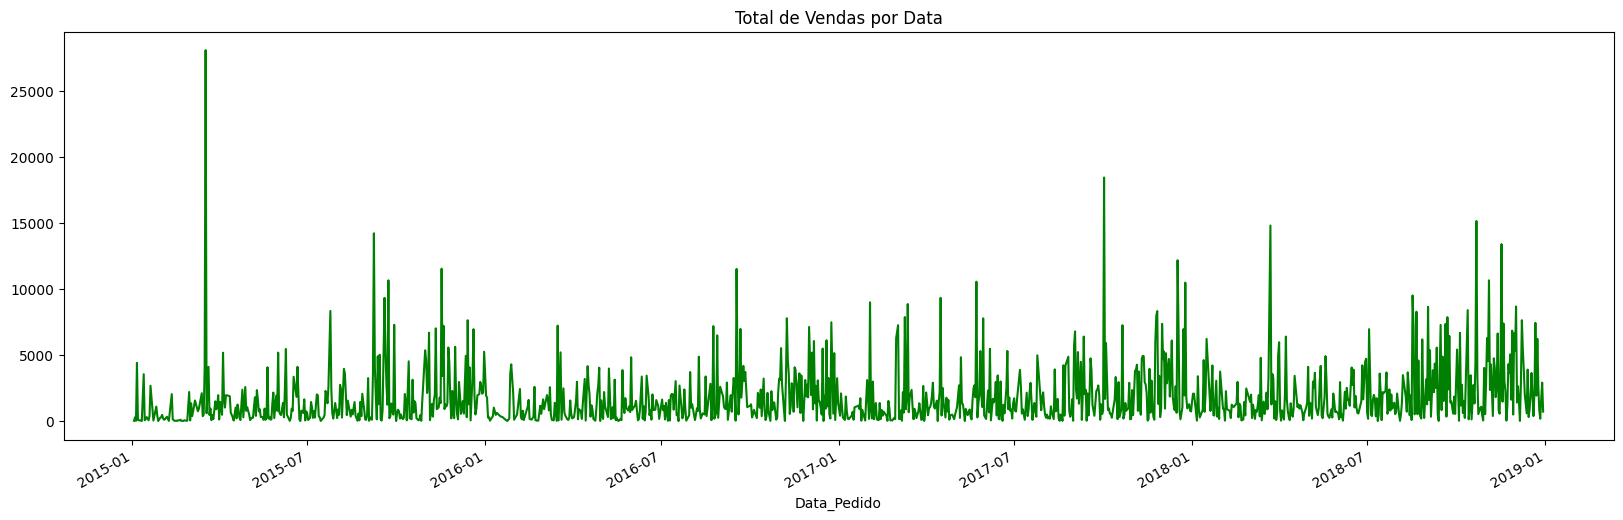

In [27]:
plt.figure(figsize=(20, 6))
plt.title("Total de Vendas por Data")
df_total_date.plot.line(x="Data_Pedido", y="Valor_Venda", color="green")

### Question 2
What is the Total Sales by State? Demonstrate the result through a bar graph.

In [28]:
df_total_state = df_sales.groupby("Estado")["Valor_Venda"].sum()
df_total_state.sort_values(ascending=False)

Estado
California              442927.0975
New York                304536.4010
Texas                   163549.8602
Washington              133826.0060
Pennsylvania            114411.6800
Florida                  88043.7000
Illinois                 78109.9270
Michigan                 76081.1740
Ohio                     74277.8020
Virginia                 68194.6700
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48083.1600
Kentucky                 36409.5800
Arizona                  35272.6570
New Jersey               34265.7120
Colorado                 31841.5980
Wisconsin                31154.4700
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            27363.2640
Delaware                 26452.5890
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon               

<Axes: title={'center': 'Total de Vendas por Estado'}, xlabel='Estado'>

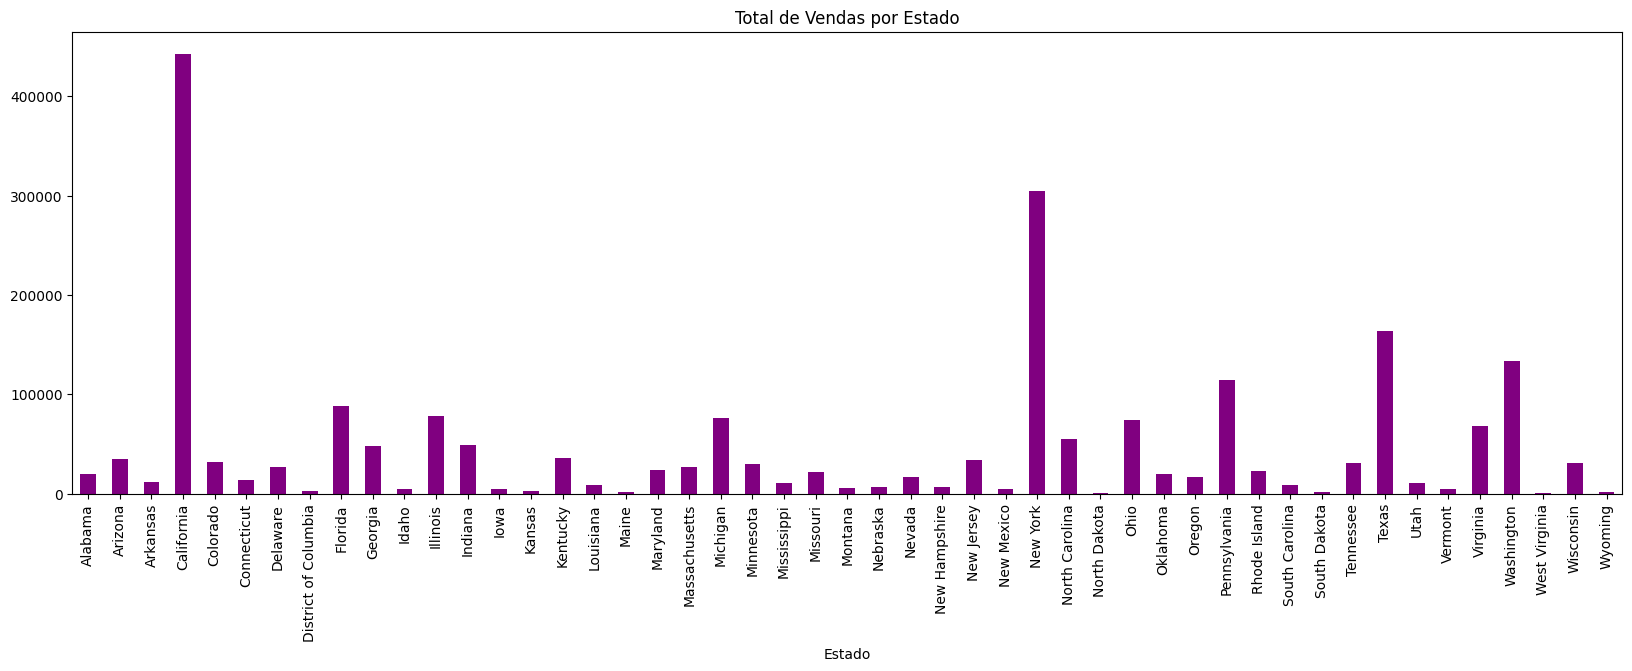

In [29]:
plt.figure(figsize=(20, 6))
plt.title("Total de Vendas por Estado")
df_total_state.plot.bar(x="Estado", y="Valor_Venda", color="purple")

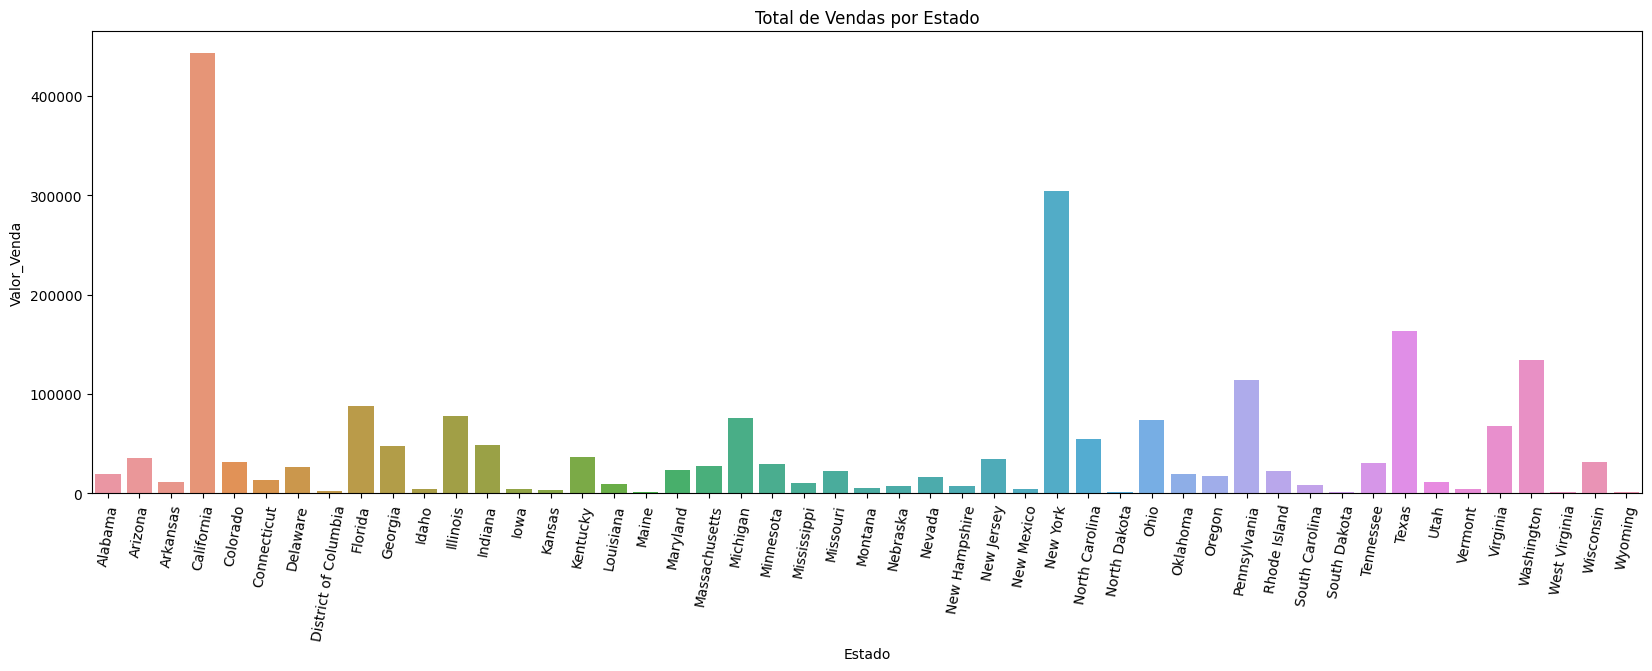

In [30]:
plt.figure(figsize=(20, 6))
sns.barplot(data=df_total_state.reset_index(), x="Estado", y="Valor_Venda").set(title="Total de Vendas por Estado")
plt.xticks(rotation=80)
plt.show()

### Question 3 
Which City has the Highest Sales Value for Products in the 'Office Supplies' Category?

In [31]:
df_office_supplies = df_sales[df_sales["Categoria"] == "Office Supplies"]
df_office_supplies

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,2015-06-10,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


In [32]:
df_total_city = df_sales.groupby("Cidade")["Valor_Venda"].sum()
df_total_city

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Valor_Venda, Length: 528, dtype: float64

In [33]:
max_total_city = df_total_city.idxmax()
max_total_city

'New York City'

In [34]:
df_total_city.sort_values(ascending=False)

Cidade
New York City    251749.219
Los Angeles      171654.633
Seattle          114725.478
San Francisco    107489.952
Philadelphia     107197.803
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Valor_Venda, Length: 528, dtype: float64